In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from seaborn import heatmap,pairplot

In [32]:
df = pd.read_csv("./evdataset.csv")

In [28]:
dfs = pd.read_csv("./evdataset.csv", chunksize=75, sep=',')

In [29]:
chunks = {}
for index, df in enumerate(dfs):
    chunks[index] = df

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Brand                        194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [34]:
df.head()

,id,Brand,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [38]:
data = df[['Top Speed', 'Battery Capacity','Gross Vehicle Weight (GVWR)','Electric Range']]

<Axes: >

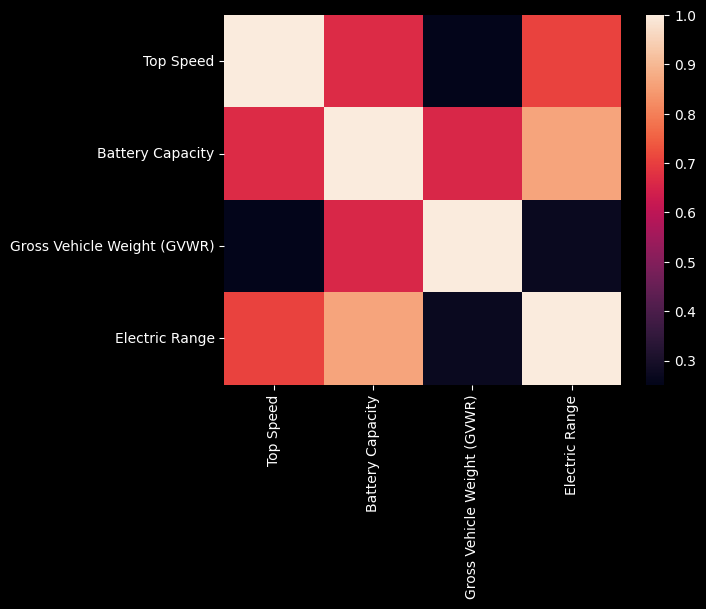

In [39]:
heatmap(data.corr())

In [40]:
# pairplot(data)

In [94]:
X = np.array(data[['Battery Capacity', 'Top Speed']])
y = np.array(data['Electric Range']).reshape(-1,1)

In [95]:
from sklearn import preprocessing
mm_scaler = preprocessing.StandardScaler()
X_train_minmax = mm_scaler.fit_transform(X)

In [96]:
X_train,x_test, y_train,y_test = train_test_split(X_train_minmax,y, test_size=0.3)

In [97]:
X_train.shape

(135, 2)

In [98]:
x_test.shape

(59, 2)

In [99]:
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    return {
        "r2_score" : r2_score(y,y_pred),
        "mean_squared_error" : mean_squared_error(y, y_pred),
        "mean_absolute_error" : mean_absolute_error(y, y_pred)
    }

In [100]:
# batch training : at time training with whole data, available

In [101]:
batch_model = LinearRegression()
batch_model.fit(X_train, y_train)

LinearRegression()

In [102]:
get_metrics(batch_model, x_test, y_test)

{'r2_score': 0.8475077129996688,
 'mean_squared_error': 2107.1074063901706,
 'mean_absolute_error': 38.69596705706168}

In [103]:
online_model = SGDRegressor(penalty=None, max_iter=100, learning_rate="constant")

In [104]:
online_model.fit(X_train,y_train.reshape(-1))

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)

In [105]:
get_metrics(online_model, x_test, y_test)

{'r2_score': 0.8472846235218799,
 'mean_squared_error': 2110.190011420125,
 'mean_absolute_error': 38.56961247991219}

In [106]:
import time

start = time.time()
online_model.partial_fit(x_test, y_test.reshape(-1))
print(time.time() - start)

0.0035915374755859375


In [107]:
get_metrics(online_model, x_test, y_test)

{'r2_score': 0.8533825238005712,
 'mean_squared_error': 2025.9304656200727,
 'mean_absolute_error': 38.075498379965104}

In [178]:
data

,Top Speed,Battery Capacity,Gross Vehicle Weight (GVWR),Electric Range
0,185,77.4,2495,390
1,160,69.7,2580,330
2,260,93.4,2880,415
3,190,83.9,2605,470
4,160,82.0,2300,450
...,...,...,...,...
189,260,93.4,2870,400
190,160,82.0,2280,450
191,135,50.0,2440,195
192,180,82.0,2715,400
